# Júlia Vieira Barbosa, RA: 791713

## LAB2

## Parte 1: Comparação de Modelos de Classificação

**Objetivo**

Comparar os seguintes modelos de classificação:

- Árvore de Decisão com poda;

- K Vizinhos mais Próximos (KNN);

- Regressão Logística;

- Floresta Aleatória;

Escolher o melhor modelo com base no desempenho em validação.

Avaliar o melhor modelo no conjunto de teste.

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.special import gamma

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-38-4599aa00c412>, line 11)

### 1. Carregar o dataset 'dataset_classificacao.csv'



In [ ]:
# 1. Carregar o dataset salvo
df = pd.read_csv("dataset_classificacao.csv")
df

# Separar variáveis explicativas e alvo
# Variáveis Explicativas
X = df.drop(columns=['target']) #x1,x2,...,x499
# Variável Resposta
y = df['target']

### 2. Separar os dados em treino, validação e teste (60%, 20%, 20%)

In [ ]:
# 2. Dividir em treino e teste
# 0.6 Treino e 0.4 Teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # 60% treino, 40% (Teste+Validação)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #40%/2 = 20% cada

### 3. Treinar Modelos

#### a) Árvore de Decisão com pode por Complexidade

In [ ]:
# 3. Treinar modelos

## a) Árvore de Decisão com poda por complexidade

# Treinar árvore inicial e obter caminho de poda
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Treinar árvores com diferentes alpha
arvores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    arvores.append(clf)

# Avaliação de desempenho na validação (métricas)
resultados = []
for modelo in arvores[:-1]:  # Tira árvore nula
    y_pred = modelo.predict(X_val)
    resultados.append({'acuracia': accuracy_score(y_val, y_pred),'precisao': precision_score(y_val, y_pred),
                       'recall': recall_score(y_val, y_pred),'f1': f1_score(y_val, y_pred)})

# Resultados
df_resultados_arvore = pd.DataFrame(resultados)
df_resultados_arvore['ccp_alpha'] = ccp_alphas[:-1]

# Melhor modelo com base no F1-score (maximiza)
melhor_idx = df_resultados_arvore['f1'].idxmax()
melhor_modelo_arvore = arvores[melhor_idx]

# df_resultados_arvore.iloc[melhor_idx]

#### b) KNN (K-Nearest Neighbors)

In [ ]:
## b) KNN (K-Nearest Neighbors)

# Valores de K para testar
valores_k = [3, 5, 10, 20]
resultados_knn = []

# Treinando e avaliando cada K
for k in valores_k:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_val) #Previsao

    resultados_knn.append({'k': k, 'acuracia': accuracy_score(y_val, y_pred),
                           'precisao': precision_score(y_val, y_pred),
                           'recall': recall_score(y_val, y_pred),
                           'f1': f1_score(y_val, y_pred)})

# Resultados
df_resultados_knn = pd.DataFrame(resultados_knn)

# Melhor modelo com base no F1-score (maximiza)
melhor_idx_knn = df_resultados_knn['f1'].idxmax()
melhor_k = df_resultados_knn.loc[melhor_idx_knn, 'k']
melhor_modelo_knn = KNeighborsClassifier(n_neighbors=melhor_k)
melhor_modelo_knn.fit(X_train, y_train)

# df_resultados_knn.iloc[melhor_idx_knn]

KNeighborsClassifier(n_neighbors=np.int64(20))

#### c) Regressão Logística (sem ajustar hiperparâmetros)

In [ ]:
## c) Regressão Logística (sem ajustar hiperparâmetros)

# Treinar modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

# Previsão no conjunto de validação
y_pred = modelo_logistico.predict(X_val)

# Avaliação do desempenho na validação
resultados_log = {'acuracia': accuracy_score(y_val, y_pred), 'precisao': precision_score(y_val, y_pred),
                  'recall': recall_score(y_val, y_pred),'f1': f1_score(y_val, y_pred)}

#Resultados
df_resultados_log = pd.DataFrame([resultados_log])
# df_resultados_log

#### d) Floresta Aleatória

In [ ]:
## d) Floresta Aleatória
#(Varias vezes)

# Hiperparâmetros a testar
criterion = ['gini', 'entropy']
max_features = ['sqrt', 'log2', None]
resultados_floresta = []

# Treinar modelos com todas as combinações
for criterio in criterion:
    for max_attr in max_features:
        modelo = RandomForestClassifier(n_estimators=100,criterion=criterio,max_features=max_attr,random_state=42)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_val)

        resultados_floresta.append({'criterio': criterio,'max_features': str(max_attr),
                                    'acuracia': accuracy_score(y_val, y_pred),'precisao': precision_score(y_val, y_pred),
                                    'recall': recall_score(y_val, y_pred),'f1': f1_score(y_val, y_pred)})

# Resultados
df_resultados_floresta = pd.DataFrame(resultados_floresta)


# Melhor modelo com base no F1-score (maximiza)
melhor_idx_floresta = df_resultados_floresta['f1'].idxmax()
melhor_linha_floresta = df_resultados_floresta.iloc[melhor_idx_floresta]

melhor_modelo_floresta = RandomForestClassifier(n_estimators=100,criterion=melhor_linha_floresta['criterio'],
                                                max_features=None if melhor_linha_floresta['max_features'] == 'None' else melhor_linha_floresta['max_features'],
                                                random_state=42)
melhor_modelo_floresta.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=None, random_state=42)

### 4. Para cada modelo (usando apenas o conjunto de validação), calcule:

Acurácia: sklearn.metrics.accuracy_score

Precisão: sklearn.metrics.precision_score

Recall: sklearn.metrics.recall_score

F1-score: sklearn.metrics.f1_score

### 5. Monte uma tabela (pandas.DataFrame) com uma linha por modelo e colunas:

'acuracia', 'precisao', 'recall', 'f1'

In [ ]:
# 4. Para cada modelo (usando apenas o conjunto de validação), calcule:

# Acurácia: sklearn.metrics.accuracy_score
# Precisão: sklearn.metrics.precision_score
# Recall: sklearn.metrics.recall_score
# F1-score: sklearn.metrics.f1_score

# 5. Monte uma tabela (pandas.DataFrame) com uma linha por modelo e colunas:
# 'acuracia', 'precisao', 'recall', 'f1'

# Árvore de Decisão
y_pred_arvore = melhor_modelo_arvore.predict(X_val)
acc_arvore = accuracy_score(y_val, y_pred_arvore)
prec_arvore = precision_score(y_val, y_pred_arvore)
rec_arvore = recall_score(y_val, y_pred_arvore)
f1_arvore = f1_score(y_val, y_pred_arvore)

# KNN
y_pred_knn = melhor_modelo_knn.predict(X_val)
acc_knn = accuracy_score(y_val, y_pred_knn)
prec_knn = precision_score(y_val, y_pred_knn)
rec_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

# Regressão Logística
y_pred_log = modelo_logistico.predict(X_val)
acc_log = accuracy_score(y_val, y_pred_log)
prec_log = precision_score(y_val, y_pred_log)
rec_log = recall_score(y_val, y_pred_log)
f1_log = f1_score(y_val, y_pred_log)

# Floresta Aleatória
y_pred_rf = melhor_modelo_floresta.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

df_comparacao_modelos = pd.DataFrame({
    'modelo': ['Árvore de Decisão', 'KNN', 'Regressão Logística', 'Floresta Aleatória'],
    'acuracia': [acc_arvore, acc_knn, acc_log, acc_rf],
    'precisao': [prec_arvore, prec_knn, prec_log, prec_rf],
    'recall': [rec_arvore, rec_knn, rec_log, rec_rf],
    'f1': [f1_arvore, f1_knn, f1_log, f1_rf]})

df_comparacao_modelos


,modelo,acuracia,precisao,recall,f1
0,Árvore de Decisão,0.8625,0.826923,0.900524,0.862155
1,KNN,0.8075,0.796875,0.801047,0.798956
2,Regressão Logística,0.6300,0.604878,0.649215,0.626263
3,Floresta Aleatória,0.8875,0.850962,0.926702,0.887218


### 6. Escolha o melhor modelo com base nas métricas de validação. Avalie esse único modelo no conjunto de teste.

In [ ]:
# 6. Escolha o melhor modelo com base nas métricas de validação.

# Usando o Maior F-score: Floresta Aleatória (0.8872)

# Avalie esse único modelo no conjunto de teste.

y_pred_teste = melhor_modelo_floresta.predict(X_test) # Previsões no teste

acuracia_teste = accuracy_score(y_test, y_pred_teste)
precisao_teste = precision_score(y_test, y_pred_teste)
recall_teste = recall_score(y_test, y_pred_teste)
f1_teste = f1_score(y_test, y_pred_teste)

print("Acuracia:", round(acuracia_teste, 4))
print("Precisao:", round(precisao_teste, 4))
print("Recall:", round(recall_teste, 4))
print("F1:", round(f1_teste, 4))


Acuracia: 0.8875
Precisao: 0.872
Recall: 0.9109
F1: 0.891


### Exiba as importâncias usando Floresta Aleatória:

Mostre um gráfico com as 20 variáveis mais importantes

Use: modelo.feature_importances_

Para plotar: matplotlib.pyplot.bar

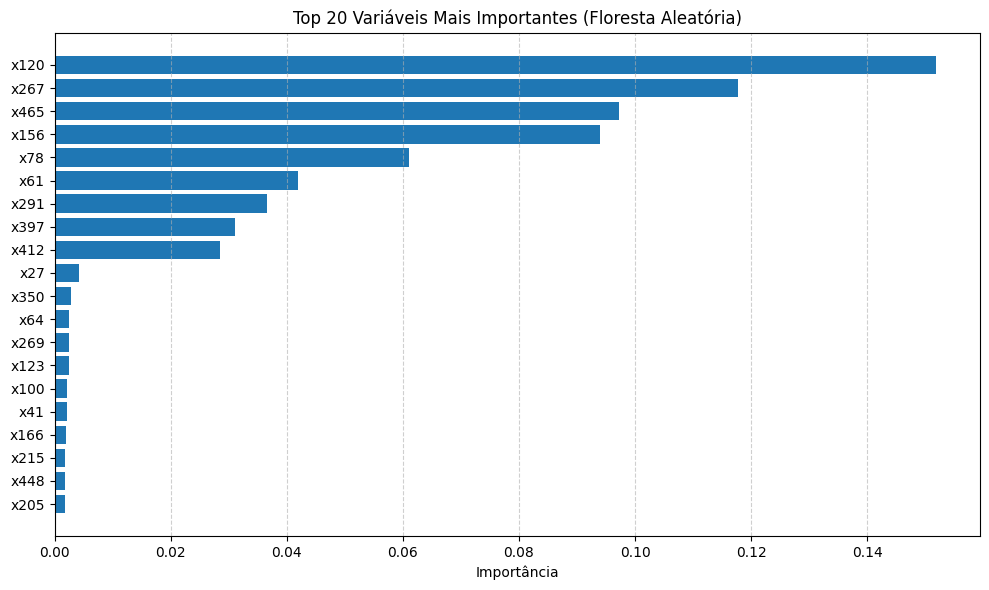

In [ ]:
# 7. Exiba as importâncias usando Floresta Aleatória:

# Mostre um gráfico com as 20 variáveis mais importantes
# Use: modelo.feature_importances_
# Para plotar: matplotlib.pyplot.bar

importancias = melhor_modelo_floresta.feature_importances_ #Variaveis da Floresta

# Nomes das variaveis e importancia
df_importancias = pd.DataFrame({'variavel': X.columns,'importancia': importancias})
df_importancias = df_importancias.sort_values('importancia', ascending=False)

top20 = df_importancias.head(20)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(top20['variavel'][::-1], top20['importancia'][::-1])
plt.xlabel("Importância")
plt.title("Top 20 Variáveis Mais Importantes (Floresta Aleatória)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#x120, x267, x156 ... mais fortesD

### 8. Utilizando a informação encontrada no item anterior, quantas covariadas você acha que são de fato importantes para o problema?


Podemos observar pelo gráfico de importâncias da Floresta Aleatória que as 5 primeiras variáveis (x120, x267, x465, x156 e x78) se destacam com importâncias muito altas com relação as outras. A partir da 6ª variável a importância começa a cair consideravelmente e a partir da 10ª possuem valores muito próximos de zero. Assim, cerca de 5 a 6 covariadas são realmente relevantes nesse modelo, r4esponsáveis pela maior explicação e capacidade preditiva.


### 9. Utilizando apenas as 5 covariadas mais importantes encontradas no item anterior, rode todos os modelos novamente e compare os melhores modelos encontrados usando todas as covariadas e os melhores modelos encontrados usando apenas as 5 mais importantes. Discuta o resultado.


In [ ]:
# 9. Utilizando apenas as 5 covariadas mais importantes encontradas no item anterior, rode todos os modelos novamente e compare os melhores modelos encontrados usando todas as covariadas e os melhores modelos encontrados usando apenas as 5 mais importantes. Discuta o resultado.

top5_variaveis = df_importancias.sort_values(by='importancia', ascending=False).head(5)['variavel'].tolist() #Ordenando pela importancia

# Filtrar os dados de treino, validação e teste com essas variáveis
X_train_top5 = X_train[top5_variaveis]
X_val_top5 = X_val[top5_variaveis]
X_test_top5 = X_test[top5_variaveis]


In [ ]:
# Treinar novamente os modelos com as 5 variáveis

# Árvore com poda
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train_top5, y_train)
ccp_alphas = path.ccp_alphas
arvores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_top5, y_train)
    arvores.append(clf)

# Avaliar na validação
resultados_arvore_top5 = []
for modelo in arvores[:-1]:
    y_pred = modelo.predict(X_val_top5)
    resultados_arvore_top5.append(f1_score(y_val, y_pred))

melhor_idx_arvore_top5 = np.argmax(resultados_arvore_top5)
melhor_modelo_arvore_top5 = arvores[melhor_idx_arvore_top5]

# KNN
melhores_resultados_knn_top5 = []
for k in [3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_top5, y_train)
    y_pred = knn.predict(X_val_top5)
    f1 = f1_score(y_val, y_pred)
    melhores_resultados_knn_top5.append((k, f1))

melhor_k_top5 = max(melhores_resultados_knn_top5, key=lambda x: x[1])[0]
melhor_modelo_knn_top5 = KNeighborsClassifier(n_neighbors=melhor_k_top5)
melhor_modelo_knn_top5.fit(X_train_top5, y_train)

# Regressão Logística
modelo_logistico_top5 = LogisticRegression()
modelo_logistico_top5.fit(X_train_top5, y_train)

# Floresta Aleatória
criterios = ['gini', 'entropy']
max_feats = ['sqrt', 'log2', None]
resultados_rf_top5 = []
modelos_rf_top5 = []

for criterio in criterios:
    for max_feat in max_feats:
        rf = RandomForestClassifier(n_estimators=100, criterion=criterio, max_features=max_feat, random_state=42)
        rf.fit(X_train_top5, y_train)
        y_pred = rf.predict(X_val_top5)
        f1 = f1_score(y_val, y_pred)
        resultados_rf_top5.append(f1)
        modelos_rf_top5.append((criterio, max_feat, rf))

melhor_idx_rf_top5 = np.argmax(resultados_rf_top5)
melhor_modelo_floresta_top5 = modelos_rf_top5[melhor_idx_rf_top5][2]


In [ ]:
# Avaliação com top 5 variáveis

# Árvore de Decisão com 5 variáveis
y_pred_arvore5 = melhor_modelo_arvore_top5.predict(X_val_top5)
acc_arvore5 = accuracy_score(y_val, y_pred_arvore5)
prec_arvore5 = precision_score(y_val, y_pred_arvore5)
rec_arvore5 = recall_score(y_val, y_pred_arvore5)
f1_arvore5 = f1_score(y_val, y_pred_arvore5)

# KNN com 5 variáveis
y_pred_knn5 = melhor_modelo_knn_top5.predict(X_val_top5)
acc_knn5 = accuracy_score(y_val, y_pred_knn5)
prec_knn5 = precision_score(y_val, y_pred_knn5)
rec_knn5 = recall_score(y_val, y_pred_knn5)
f1_knn5 = f1_score(y_val, y_pred_knn5)

# Regressão Logística com 5 variáveis
y_pred_log5 = modelo_logistico_top5.predict(X_val_top5)
acc_log5 = accuracy_score(y_val, y_pred_log5)
prec_log5 = precision_score(y_val, y_pred_log5)
rec_log5 = recall_score(y_val, y_pred_log5)
f1_log5 = f1_score(y_val, y_pred_log5)

# Floresta Aleatória com 5 variáveis
y_pred_rf5 = melhor_modelo_floresta_top5.predict(X_val_top5)
acc_rf5 = accuracy_score(y_val, y_pred_rf5)
prec_rf5 = precision_score(y_val, y_pred_rf5)
rec_rf5 = recall_score(y_val, y_pred_rf5)
f1_rf5 = f1_score(y_val, y_pred_rf5)

df_top5 = pd.DataFrame({
    'modelo': ['Árvore de Decisão (5 variaveis)', 'KNN (5 variaveis)',
               'Regressão Logística (5 variaveis)', 'Floresta Aleatória (5 variaveis)'],
    'acuracia': [acc_arvore5, acc_knn5, acc_log5, acc_rf5],
    'precisao': [prec_arvore5, prec_knn5, prec_log5, prec_rf5],
    'recall': [rec_arvore5, rec_knn5, rec_log5, rec_rf5],
    'f1': [f1_arvore5, f1_knn5, f1_log5, f1_rf5]
})

df_top5


,modelo,acuracia,precisao,recall,f1
0,Árvore de Decisão (5 variaveis),0.8725,0.860825,0.874346,0.867532
1,KNN (5 variaveis),0.8975,0.857143,0.942408,0.897756
2,Regressão Logística (5 variaveis),0.7900,0.746544,0.848168,0.794118
3,Floresta Aleatória (5 variaveis),0.8875,0.854369,0.921466,0.886650


In [ ]:
# Comparação com os modelos iniciais (com todas as variaveis)
comparacao_final = pd.concat([df_comparacao_modelos, df_top5])
comparacao_final

,modelo,acuracia,precisao,recall,f1
0,Árvore de Decisão,0.8625,0.826923,0.900524,0.862155
1,KNN,0.8075,0.796875,0.801047,0.798956
2,Regressão Logística,0.6300,0.604878,0.649215,0.626263
3,Floresta Aleatória,0.8875,0.850962,0.926702,0.887218
0,Árvore de Decisão (5 variaveis),0.8725,0.860825,0.874346,0.867532
1,KNN (5 variaveis),0.8975,0.857143,0.942408,0.897756
2,Regressão Logística (5 variaveis),0.7900,0.746544,0.848168,0.794118
3,Floresta Aleatória (5 variaveis),0.8875,0.854369,0.921466,0.886650


Os resultados dos modelos treinados com as 5 variáveis são bem próximos dos modelos treinados com todas as covariáveis. Isso significa que grande parte de TODAS as variáveis possui pouca relevância e um modelo mais simples e menos custoso pode ser eficiente e também mais interpretável.

## Parte 2: Medição Dimensão

### Exercício 1: Ângulos entre vetores aleatórios em alta dimensão

**Objetivo**

Explorar como o ângulo entre vetores aleatórios muda com o aumento da dimensão do espaço vetorial.

**Descrição**

Você irá gerar pares de vetores aleatórios com componentes independentes e distribuídos segundo uma normal padrão, e calcular o ângulo entre eles em diferentes dimensões.

**Etapas sugeridas**

1. Para cada dimensão $d \in \{2, 5, 10, 20, 50, 100, 200, 500, 1000\}$:
    - Gere dois vetores aleatórios $a, b \in \mathbb{R}^d$, com entradas iid $\sim \mathcal{N}(0, 1)$.

    Dica: use np.random.normal(loc=0, scale=1, size=d)
    
    - Calcule o produto escalar $\langle a, b \rangle$.

    Dica: use np.dot(a, b)
    
    - Calcule as normas $\|a\|$ e $\|b\|$.
    
    Dica: use np.linalg.norm(v)
    
    - Obtenha o cosseno do ângulo: $\cos(\theta) = \frac{\langle a, b \rangle}{\|a\| \cdot \|b\|}$
    
    - Calcule o ângulo $\theta$ (em radianos ou graus).

    Dica: use np.arccos(...) e depois np.degrees(...) se quiser converter para graus.


2. Repita esse procedimento para vários pares (ex: 1000) e plote o histograma dos ângulos obtidos para cada dimensão.


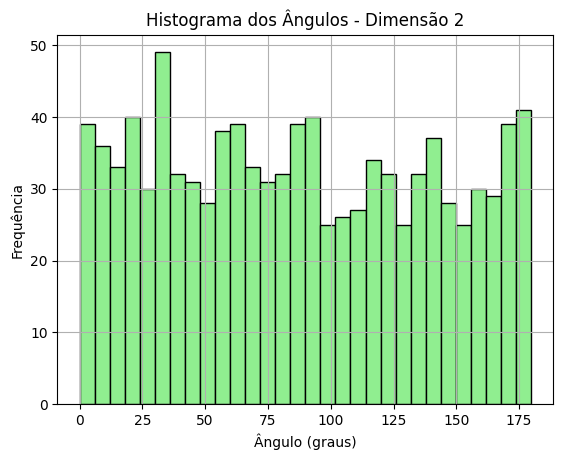

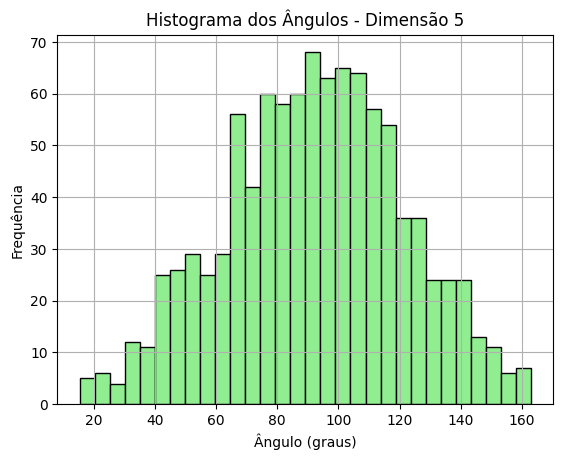

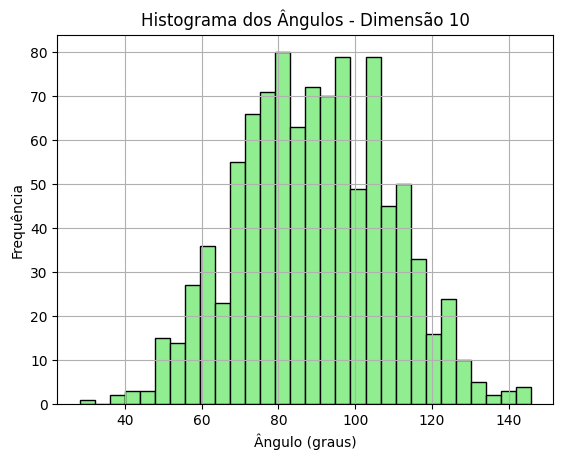

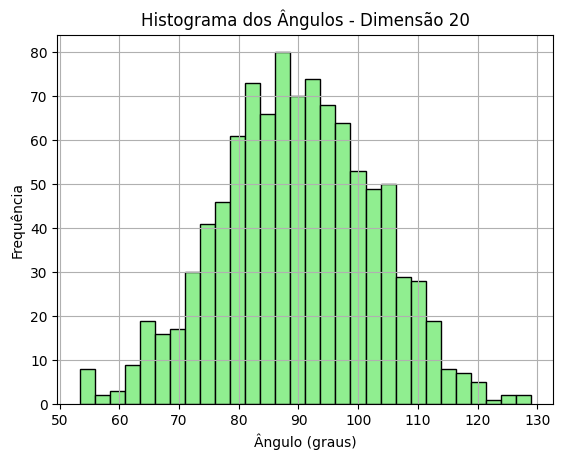

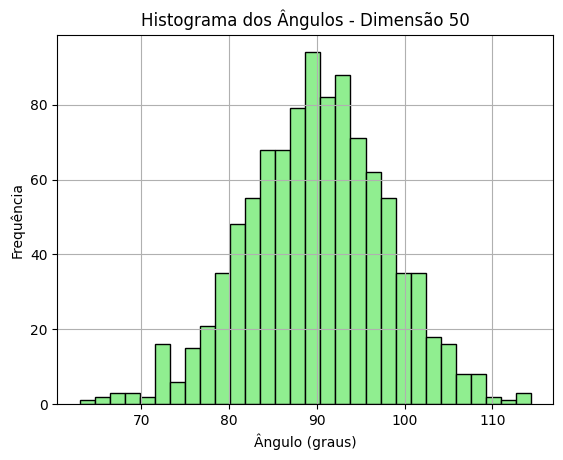

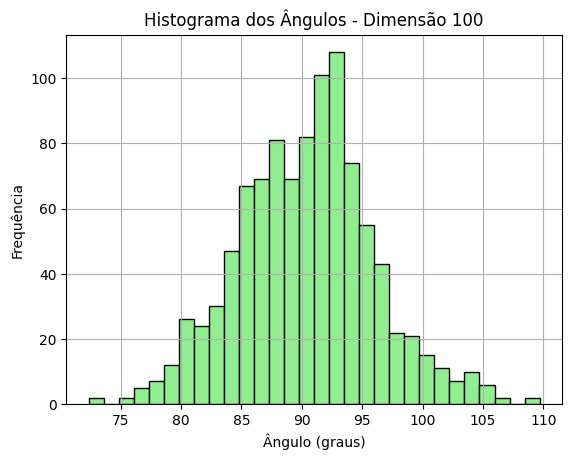

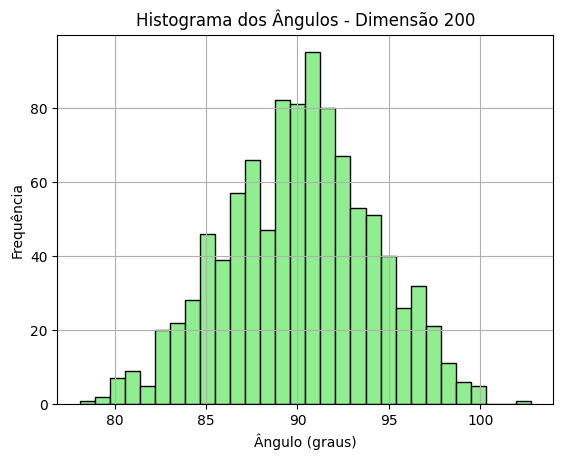

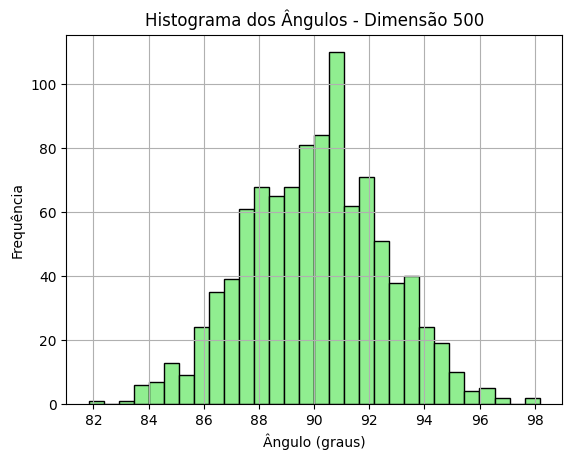

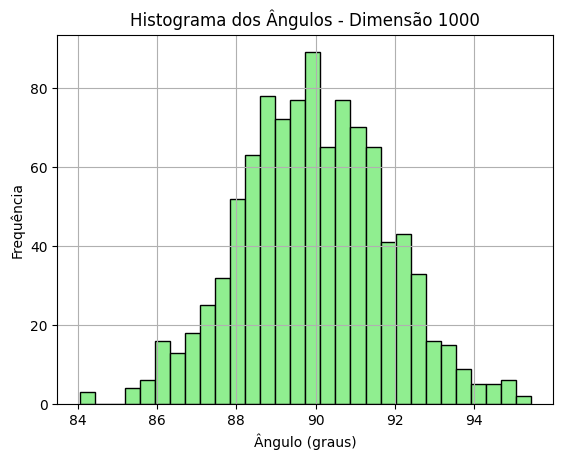

In [ ]:
dimensoes = [2, 5, 10, 20, 50, 100, 200, 500, 1000]
n_pares = 1000

for d in dimensoes:
    angulos = []  # Angulos para cada par
    for _ in range(n_pares):
        a = np.random.normal(0, 1, size=d) # Vetor a com distr. normal
        b = np.random.normal(0, 1, size=d) # Vetor b com distr. normal
        produto = np.dot(a, b) # Produto escalar
        norma_a = np.linalg.norm(a) # Norma vetor a
        norma_b = np.linalg.norm(b) # Norma vetor b
        cos_theta = produto / (norma_a * norma_b) # Cosseno
        cos_theta = np.clip(cos_theta, -1, 1)
        angulo = np.arccos(cos_theta)
        angulo = np.degrees(angulo) # Angulo pra esse cenário (Em graus)
        angulos.append(angulo)

    plt.figure()
    plt.hist(angulos, bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Histograma dos Ângulos - Dimensão {d}')
    plt.xlabel('Ângulo (graus)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


**Perguntas para reflexão**

- Como os ângulos se distribuem em dimensões baixas?

Em dimensões baixas, os vetores aleatórios gerados com distribuição normal padrão (0,1) formam ângulos bem variados, sem seguir uma tendência específica a determinado ângulo (pequenos ou grandes).

\

- O que acontece com essa distribuição conforme a dimensão aumenta?

Conforme a dimensão vai aumentando, os ângulos entre vetores começam a se concentrar em torno de 90 graus (quase ortogonais).

\

- Por que, em alta dimensão, os vetores aleatórios tendem a formar ângulos próximos de 90 graus? Tente justificar essa observação com base nas propriedades da distribuição normal e no comportamento do produto escalar e das normas em alta dimensão.

Sorteamos cada coordenada dos vetores $ a, b $ de forma independente segundo uma normal padrão (0,1), ou seja, com $ \mu = 0 $ e então $ \mathbb{E}[a_i b_i] = 0 $.

Como o produto escalar é dado por $\langle a, b \rangle = \sum_{i=1}^d a_i b_i$, conforme a dimensão vai aumentando, a média do produto escalar tende a zero.

Além disso, as normas tendem a crescer com a raiz da dimensão: $\|a\| \approx \sqrt{d}, \quad \|b\| \approx \sqrt{d}$

Portanto, jutando as duas questões, temos: $\cos(\theta) = \frac{\langle a, b \rangle}{\|a\| \cdot \|b\|} \approx \frac{0}{d} = 0$, ou seja, o cosseno do ângulo entre eles se aproxima de zero. E assim, $\theta$ tende a 90 graus.



### Exercício 2: Volume da bola unitária dentro do cubo em alta dimensão

**Objetivo**

Investigar como o volume da bola unitária se comporta em relação ao volume do cubo que a contém, conforme a dimensão aumenta.

**Fenômeno observado**

O volume da bola unitária centrada na origem, contida no cubo $[-1,1]^{d}$, tende a zero com o aumento da dimensão $d$

**Tarefa**

1. Para cada dimensão $ d \in \{1, 2, 3, \ldots, 20\} $:

    - Gere $ n $ pontos aleatórios com distribuição uniforme no cubo $[-1, 1]^d$.

    Dica: use np.random.uniform(-1, 1, size=(n, d))
    
    - Calcule a norma euclidiana de cada ponto.

    Dica: use np.linalg.norm(...) ao longo do eixo 1.
    
    - Verifique quantos pontos caem dentro da bola de raio 1 centrada na origem.
    
    - Estime o volume da bola pela proporção de pontos que caem dentro, multiplicada pelo volume do cubo $ 2^d $.

2. Para comparação, calcule o volume teórico da bola unitária em $d$ dimensões:
$V_d = \frac{\pi^{d/2}}{\Gamma(d/2 + 1)}$

  Dica: use scipy.special.gamma para calcular a função gama.


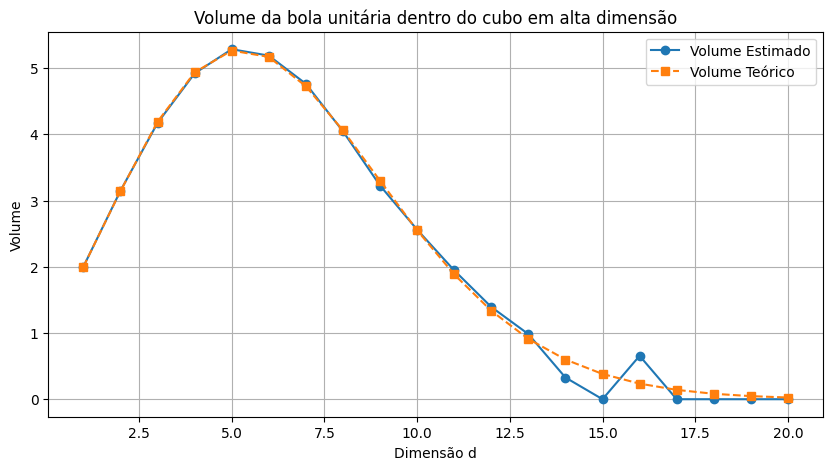

In [ ]:
n = 100000
dimensoes = range(1, 21) # Dimensoes p testar
volumes_estimados = [] # Resultados
volumes_teoricos = [] # Resultados

for d in dimensoes:
    pontos = np.random.uniform(-1, 1, size=(n, d)) # Gerar n pontos uniformemente no cubo
    normas = np.linalg.norm(pontos, axis=1) # Norma (distância da origem)
    dentro_bola = np.sum(normas <= 1)     # Qtde pontos que caem dentro da bola

    # Volume bola estimado
    proporcao = dentro_bola / n
    volume_cubo = 2 ** d
    volume_estimado = proporcao * volume_cubo
    volumes_estimados.append(volume_estimado)

    # Volume teórico da bola unitária
    volume_teorico = (np.pi ** (d / 2)) / gamma(d / 2 + 1)
    volumes_teoricos.append(volume_teorico)

# Comparação dos dois
plt.figure(figsize=(10, 5))
plt.plot(dimensoes, volumes_estimados, 'o-', label='Volume Estimado')
plt.plot(dimensoes, volumes_teoricos, 's--', label='Volume Teórico')
plt.title('Volume da bola unitária dentro do cubo em alta dimensão')
plt.xlabel('Dimensão d')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Perguntas para reflexão**

- O que acontece com o volume da bola unitária conforme a dimensão cresce?

Conforma a dimensão cresce, o volume da bola unitária diminui e tende a zero.

\

- Por que o volume estimado tende a zero, mesmo com muitos pontos?

Porque conforme a dimensão aumenta, a probabilidade de um ponto cair dentro da bola unitária também tende a zero, e assim, o volume estimado também diminui. Em dimensões baixas ainda temos pontos caindo dentro da bola, mas em altas, a maior parte dos pontos gerados no cubo $[-1,1]^d$ fica longo do centro onde está a bola.

\

- O que isso nos diz sobre a concentração da massa em espaços de alta dimensão?

Podemos perceber que a massa se concentra longe do centro do espaço (Maldição da Dimensionalidade, como visto em Aprendizado Estatístico), ou seja, a maior parte do volume está nas bordas do cubo e regiões centrais não recebem quase nenhuma massa.


### Exercício 2: Concentração da massa na casca da bola unitária

**Objetivo**

Investigar como, em alta dimensão, a maior parte da massa da bola unitária se concentra em uma casca fina próxima da superfície.

**Fenômeno observado**

Para pontos gerados uniformemente dentro da bola unitária de $ \mathbb{R}^d $, a maioria se concentra em uma fina camada próxima do raio 1 — ou seja, a massa se acumula na casca da bola quando $ d $ cresce.


### Parte 1: Método geral de amostragem uniforme na bola unitária

Para gerar um ponto uniforme dentro da bola unitária em $ \mathbb{R}^d $:

1. Amostre um vetor $ z \sim \mathcal{N}(0, I_d) $
2. Normalize: $ \mathbf{z}_{\text{unit}} = \frac{z}{\|z\|} $
3. Sorteie $ u \sim \text{Uniform}(0, 1) $
4. Defina o raio como $ r = u^{1/d} $
5. O ponto amostrado é: $ x = r \cdot \mathbf{z}_{\text{unit}} $


In [ ]:
# Parte 1

# Gerar pontos uniformemente distribuídos na bola unitária (dimensão d)
def gerar_pontos_bola(d, n):
    z = np.random.normal(0, 1, size=(n, d)) # Normal Padrão
    z_unit = z / np.linalg.norm(z, axis=1)[:, np.newaxis] # Normalização (Direção na esfera)
    u = np.random.uniform(0, 1, size=n) # Amostra de raio
    r = u ** (1 / d) # Raio ajustado
    pontos = z_unit * r[:, np.newaxis] # Ponto amostrado final
    return pontos

### Parte 2: Verificação visual no plano (caso \( d = 2 \))

Implemente o método com \( d = 2 \) e \( n = 10000 \). Plote os pontos gerados.

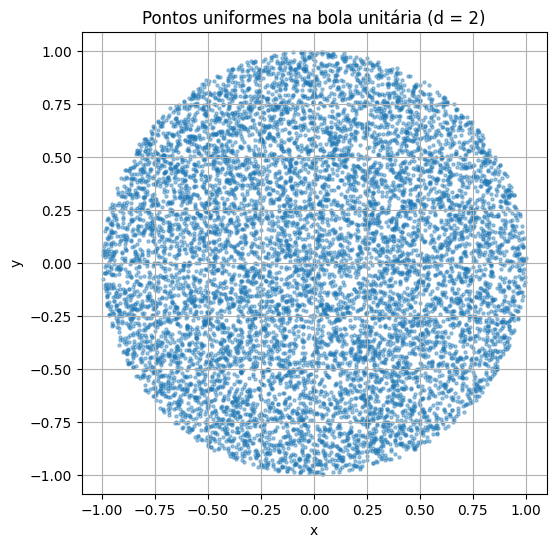

In [ ]:
n = 10000
d = 2
pontos = gerar_pontos_bola(d, n)

plt.figure(figsize=(6, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], alpha=0.4, s=5)
plt.title("Pontos uniformes na bola unitária (d = 2)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.show()


### Parte 3: Concentração da massa em alta dimensão

Para cada dimensão $ d \in \{2, 5, 10, 20, 50, 100, 200\} $:

1. Gere $ n $ pontos usando o método acima.
2. Calcule a norma euclidiana de cada ponto.
3. Plote o histograma das normas para cada dimensão.
4. Calcule a fração de pontos cuja norma não está no intervalo $ [1 - \varepsilon, 1] $, com $ \varepsilon = 0.01 $ ou $ 0.05 $.

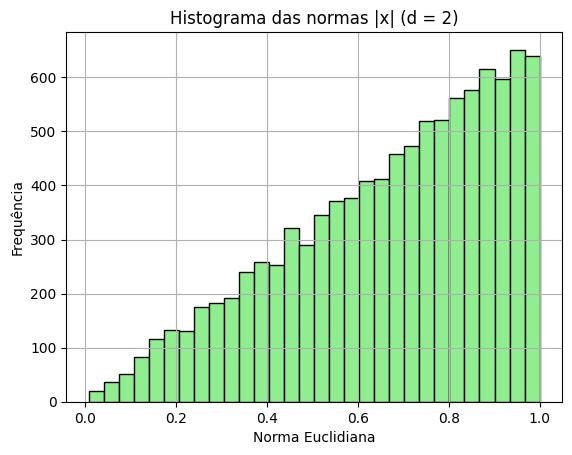

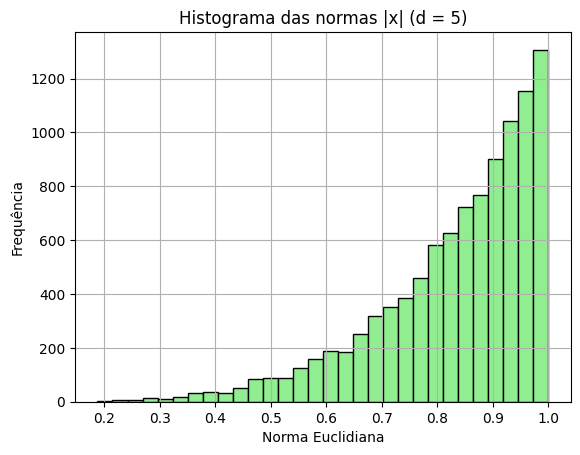

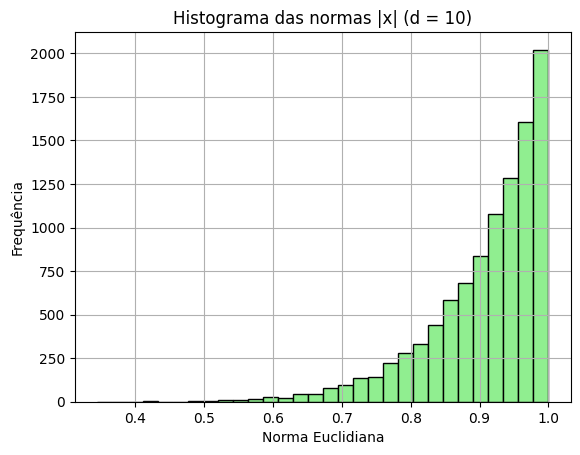

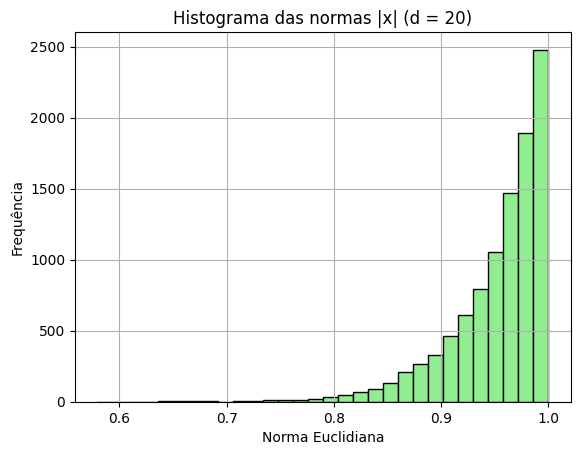

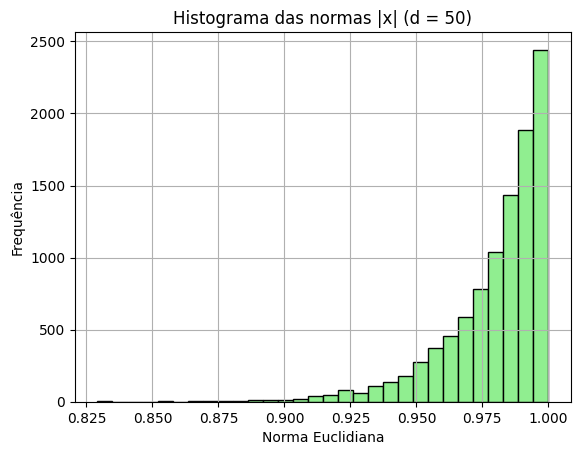

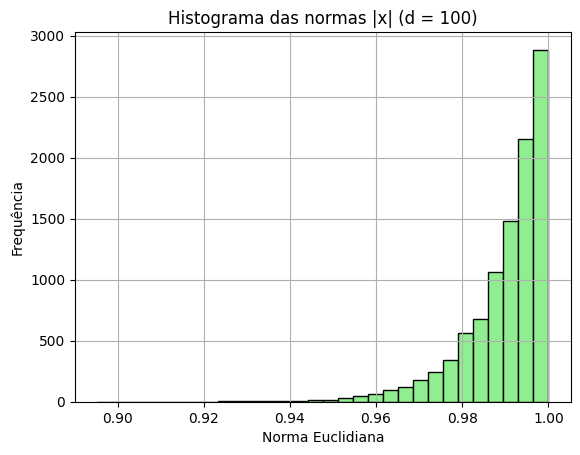

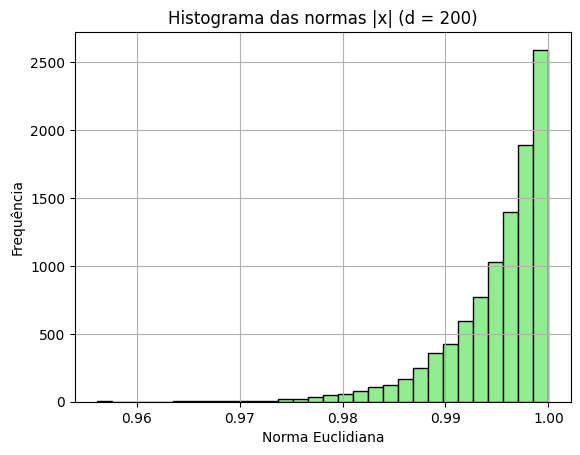


Fração de pontos na casca para ε = 0.01:
  d = 2: 0.020
  d = 5: 0.048
  d = 10: 0.096
  d = 20: 0.183
  d = 50: 0.391
  d = 100: 0.635
  d = 200: 0.865

Fração de pontos na casca para ε = 0.05:
  d = 2: 0.099
  d = 5: 0.229
  d = 10: 0.402
  d = 20: 0.645
  d = 50: 0.921
  d = 100: 0.995
  d = 200: 1.000


In [ ]:
n = 10000
epsilons = [0.01, 0.05]
dimensoes = [2, 5, 10, 20, 50, 100, 200]

frac_pontos = {eps: [] for eps in epsilons} # Frações de pontos dentro da casca pra cada epsilon

for d in dimensoes:
    pontos = gerar_pontos_bola(d, n)
    normas = np.linalg.norm(pontos, axis=1)

    plt.figure()
    plt.hist(normas, bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Histograma das normas |x| (d = {d})')
    plt.xlabel('Norma Euclidiana')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

    for eps in epsilons: # Fração de pontos na casca [1 - eps, 1]
        dentro = (normas >= (1 - eps)) & (normas <= 1)
        frac = np.sum(dentro) / n
        frac_pontos[eps].append(frac)

for eps in epsilons:
    print(f"\nFração de pontos na casca para ε = {eps}:")
    for d, frac in zip(dimensoes, frac_pontos[eps]):
        print(f"  d = {d}: {frac:.3f}")


**Perguntas para reflexão**

- Como se comporta a distribuição das distâncias à origem conforme a dimensão aumenta?

Conforme a dimensão aumenta, a distribuição das distâncias à origem fica cada vez mais concentrada em torno de um valor próximo de 1, ou seja, os pontos amostrados dentro da bola unitária tendem a se acumular em uma casca "fina" próxima da superfície da bola.


\

- A que distância da origem estão a maioria dos pontos?

A maioria dos pontos está a uma distância próxima de 1 (raio da bola), ou seja, na borda da bola.


\

- Qual é a consequência prática desse fenômeno para algoritmos que dependem de densidade ou centralidade?

O fato da maioria dos dados estarem nas bordas muda completamente como tratar a lcalização, distâncias, etc. Métodos baseados em distâncias (como KNN) são interferidos, pois se torna complexa a distinção entre pontos "próximos ou distantes". Além disso, os pontos próximos do centro da distribuição são raros e isso pode atrapalhar algoritmos na identificação de "regiões centrais", por exemplo. Por isso, técnicas de redução de dimensionalidade ou modelos específicos são essenciais quando temos alta dimensão nos dados.

In [ ]:
!jupyter nbconvert --execute --to html "/content/Julia_Vieira_Barbosa_LAB2_MineracaoDeDados_20251 (1).ipynb"

[NbConvertApp] Converting notebook /content/Julia_Vieira_Barbosa_LAB2_MineracaoDeDados_20251 (1).ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 1333184 bytes to /content/Julia_Vieira_Barbosa_LAB2_MineracaoDeDados_20251 (1).html
